<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [35]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(12,10)
from sklearn.linear_model import LinearRegression
from scipy import stats

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
house = pd.read_csv('Sacramento_transactions.csv')

In [107]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER: Price, this is the dependant variable

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER location, number of beds and bath, area size, type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

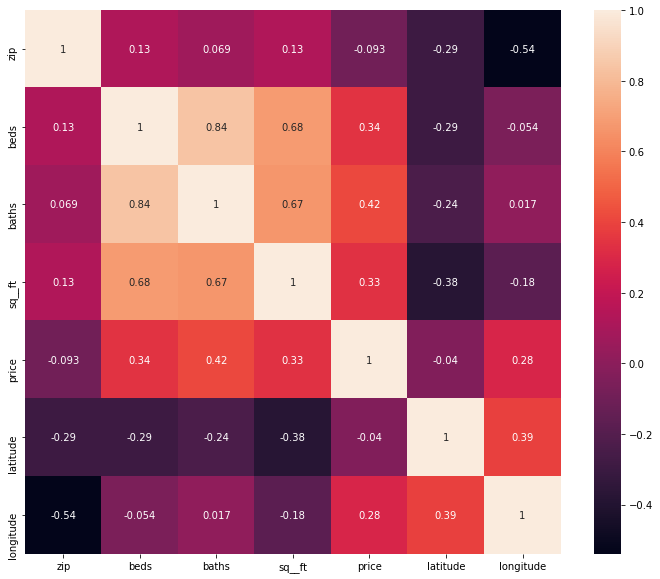

In [12]:
# ANSWER 
sns.heatmap(house.corr(),annot=True);

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [ ]:
# ANSWER use linear Regression model

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [80]:
x.shape

(985, 1)

In [129]:
x = np.array(house.baths).reshape((-1,1))
y = np.array(house.price)
lm = LinearRegression().fit(x,y)
lm.coef_, lm.score(x,y)

(array([64318.53523673]), 0.17322915474708334)

In [92]:
# # ANSWER

# x= house.loc[:,'beds':'sq__ft']
# y= house.loc[:,'price']
# lm = LinearRegression().fit(x,y)
# y_pred = house.loc[980:984,'beds':'sq__ft']

# lm.intercept_, lm.coef_, lm.score(x,y)

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [ ]:
# ANSWER
x= house.loc['baths']
y= house.loc['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [115]:
# ANSWER
j = house['price']-house['price'].mean()
k = house['baths']-house['baths'].mean()
l = (house['baths']-house['baths'].mean())**2

beta_1 = sum(j*k)/sum(l)
beta_1


64318.53523673409

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [116]:
# ANSWER

beta_0 = house['price'].mean()-(beta_1*house['baths'].mean())
beta_0

119872.75465554858

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [117]:
# ANSWER
yhat = beta_0 + (beta_1 * 1)
yhat

184191.28989228266

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [118]:
# ANSWER
residual = 59222 - yhat
residual

-124969.28989228266

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [131]:
# ANSWER
x = np.array(house.baths).reshape((-1,1))
y_pred = lm.predict(x)

SStot = sum((house.price-house.price.mean())**2)
SSres = sum((house.price-y_pred)**2)

R2 = 1-(SSres/SStot)
R2

0.17322915474708278

In [130]:
lm.score(x,y)

0.17322915474708334

##### 2.7.F [BONUS] Draw Plot of Predicted Line

Text(0.5, 1.0, 'Price of House By The Number of Baths')

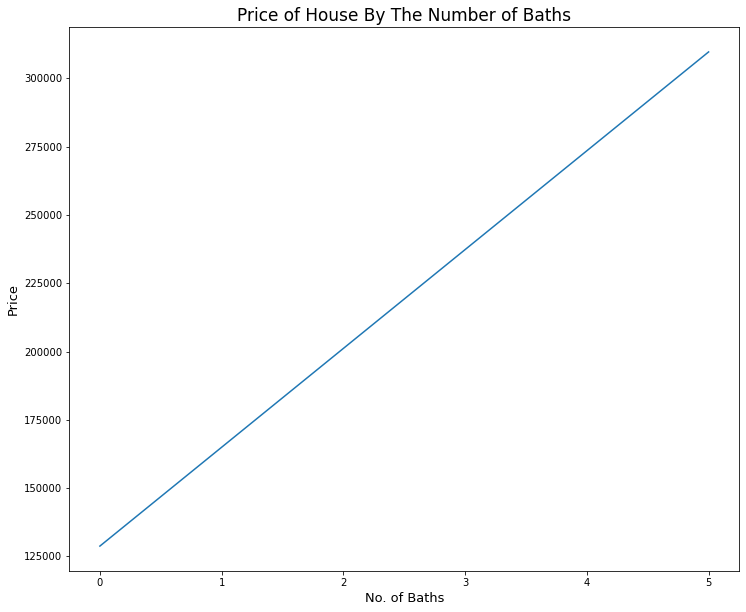

In [126]:
# ANSWER
func = lambda x: m*x + b
x= np.array([0,5])
y=np.array([func(0), func(5)])

plt.plot(x,y);
plt.xlabel('No. of Baths', fontsize=13);
plt.ylabel('Price', fontsize=13);
plt.title('Price of House By The Number of Baths', fontsize=17)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [133]:

# ANSWER

x= house.loc[:,'beds':'sq__ft']
y= house.loc[:,'price']
lm = LinearRegression().fit(x,y)
y_pred = np.array([3,2,1204]).reshape(-1,3)



print(f" The price of the house is ${lm.predict(y_pred)}")

 The price of the house is $[245118.97188741]




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



